In [23]:
%load_ext autoreload
%autoreload 2

from tweedejaars_project import load_df, get_splits, show_basic_metrics
from tweedejaars_project.utility.misc import flatten_ptu
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import *
from sklearn.metrics import *

df = load_df()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.99      0.94     13228
        True       0.10      0.01      0.02      1456

    accuracy                           0.89     14684
   macro avg       0.50      0.50      0.48     14684
weighted avg       0.82      0.89      0.85     14684

Confusion Matrix:


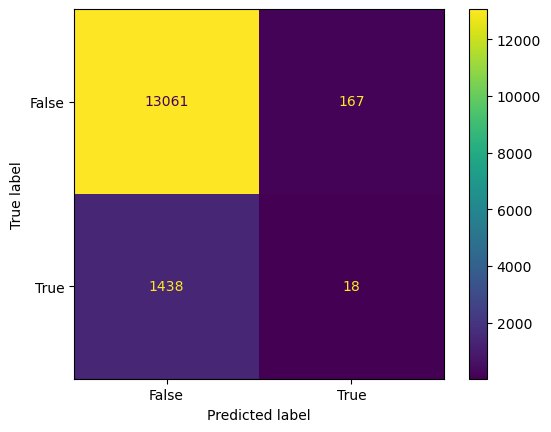

In [27]:
splits = get_splits(df, ['PTU', 'import_capacity'], return_dict_pair=False)
m = ExtraTreesClassifier()
m.fit(*splits['train'])
p = m.predict(splits['valid'][0])

show_basic_metrics(df['target_two_sided_ptu'], p, df['ptu_id'])

temp = df[110000:] # 110240 target is false maar is wel twoside
# vraag voor final delivery hoe en hoe realtime
# vraag correctheid van metrics
# vraag hun performance en model type

In [25]:
df['fake_ptu'] = (df['ptu_id'] + 4) % 96 + 1
df['check'] = df['PTU'] == df['fake_ptu'] 
print(df['check'].all())
temp = df[133900:] # 133979 zomertijd jumpt van 8 naar 13

False


In [26]:
# Calculate the time difference between consecutive rows
df['time_diff'] = df['datetime'].diff()

# Check if all time differences are equal to one minute
is_every_minute = (df['time_diff'] == pd.Timedelta(minutes=1))[1:].all()
is_every_minute

True